In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-mental-health-survey/MentalHealthSurvey.csv


In [4]:
data = pd.read_csv('/kaggle/input/student-mental-health-survey/MentalHealthSurvey.csv')

             age  study_satisfaction  academic_workload   academic_pressure  \
count  87.000000           87.000000           87.000000          87.000000   
mean   19.942529            3.931034            3.885057           3.781609   
std     1.623636            1.043174            0.854880           1.125035   
min    17.000000            1.000000            2.000000           1.000000   
25%    19.000000            3.000000            3.000000           3.000000   
50%    20.000000            4.000000            4.000000           4.000000   
75%    21.000000            5.000000            4.500000           5.000000   
max    26.000000            5.000000            5.000000           5.000000   

       financial_concerns  social_relationships  depression    anxiety  \
count           87.000000             87.000000   87.000000  87.000000   
mean             3.390805              2.781609    3.218391   3.218391   
std              1.400634              1.175578    1.367609   1.29

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


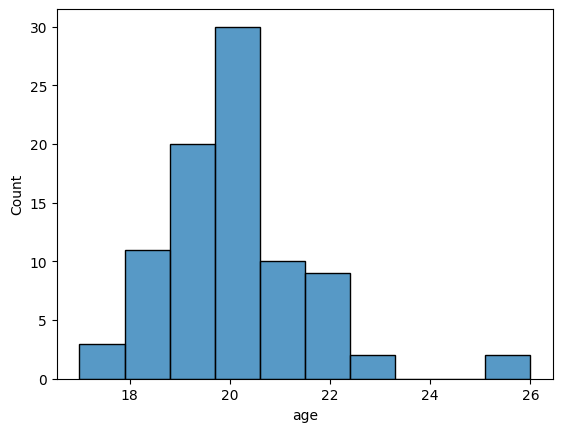

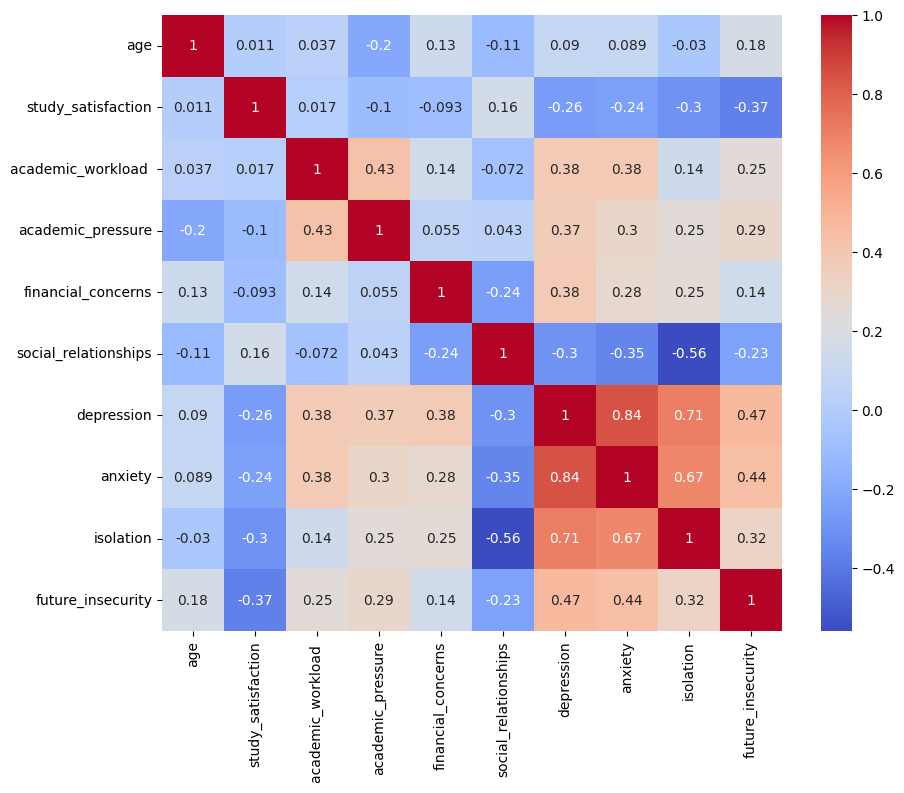

   gender  age university   degree_level      degree_major academic_year  \
0    Male   20         PU  Undergraduate      Data Science      2nd year   
1    Male   20        UET   Postgraduate  Computer Science      3rd year   
2    Male   20       FAST  Undergraduate  Computer Science      3rd year   
3    Male   20        UET  Undergraduate  Computer Science      3rd year   
4  Female   20        UET  Undergraduate  Computer Science      3rd year   

      cgpa residential_status campus_discrimination sports_engagement  ...  \
0  3.0-3.5         Off-Campus                    No         No Sports  ...   
1  3.0-3.5         Off-Campus                    No         1-3 times  ...   
2  2.5-3.0         Off-Campus                    No         1-3 times  ...   
3  2.5-3.0          On-Campus                    No         No Sports  ...   
4  3.0-3.5         Off-Campus                   Yes         No Sports  ...   

  study_satisfaction  academic_workload   academic_pressure  \
0          

In [5]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/kaggle/input/student-mental-health-survey/MentalHealthSurvey.csv')

# Basic statistics of the dataset
print(data.describe())

# Checking for missing values
print(data.isnull().sum())

# Plotting the distribution of a few important features
sns.histplot(data['age'])
plt.show()

# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


# Display the first few rows of the dataset
print(data.head())

# Display the list of columns
print(data.columns)



In [7]:
# Check the column names
print(data.columns)



Index(['gender', 'age', 'university', 'degree_level', 'degree_major',
       'academic_year', 'cgpa', 'residential_status', 'campus_discrimination',
       'sports_engagement', 'average_sleep', 'study_satisfaction',
       'academic_workload ', 'academic_pressure', 'financial_concerns',
       'social_relationships', 'depression', 'anxiety', 'isolation',
       'future_insecurity', 'stress_relief_activities'],
      dtype='object')


In [10]:
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data)

# Split data into features and target variable
X = data_encoded.drop('depression', axis=1)  # Use 'depression' as the target column
y = data_encoded['depression']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 44.44%


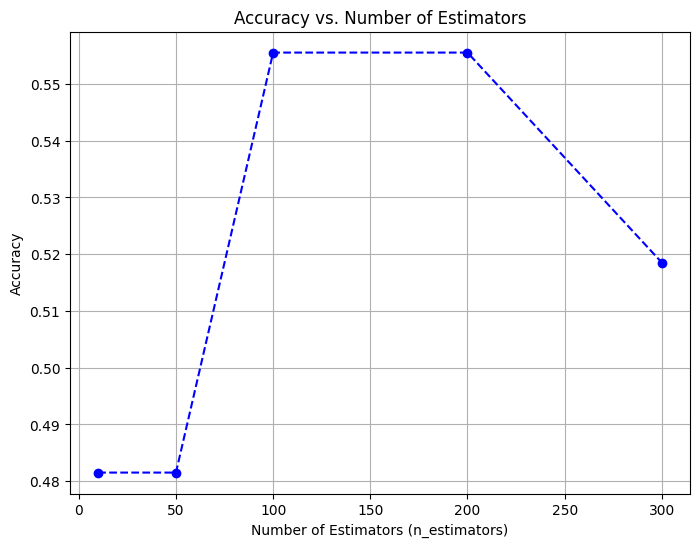

In [11]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a list to store accuracy for different n_estimators
n_estimators_list = [10, 50, 100, 200, 300]
accuracies = []

# Loop through different values of n_estimators
for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy values
plt.figure(figsize=(8, 6))
plt.plot(n_estimators_list, accuracies, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


             age  study_satisfaction  academic_workload   academic_pressure  \
count  87.000000           87.000000           87.000000          87.000000   
mean   19.942529            3.931034            3.885057           3.781609   
std     1.623636            1.043174            0.854880           1.125035   
min    17.000000            1.000000            2.000000           1.000000   
25%    19.000000            3.000000            3.000000           3.000000   
50%    20.000000            4.000000            4.000000           4.000000   
75%    21.000000            5.000000            4.500000           5.000000   
max    26.000000            5.000000            5.000000           5.000000   

       financial_concerns  social_relationships  depression    anxiety  \
count           87.000000             87.000000   87.000000  87.000000   
mean             3.390805              2.781609    3.218391   3.218391   
std              1.400634              1.175578    1.367609   1.29

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


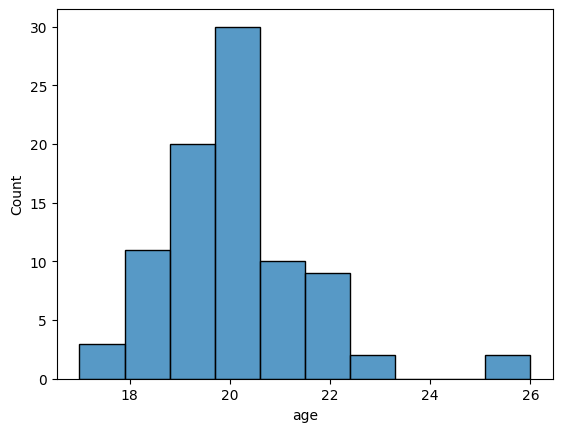

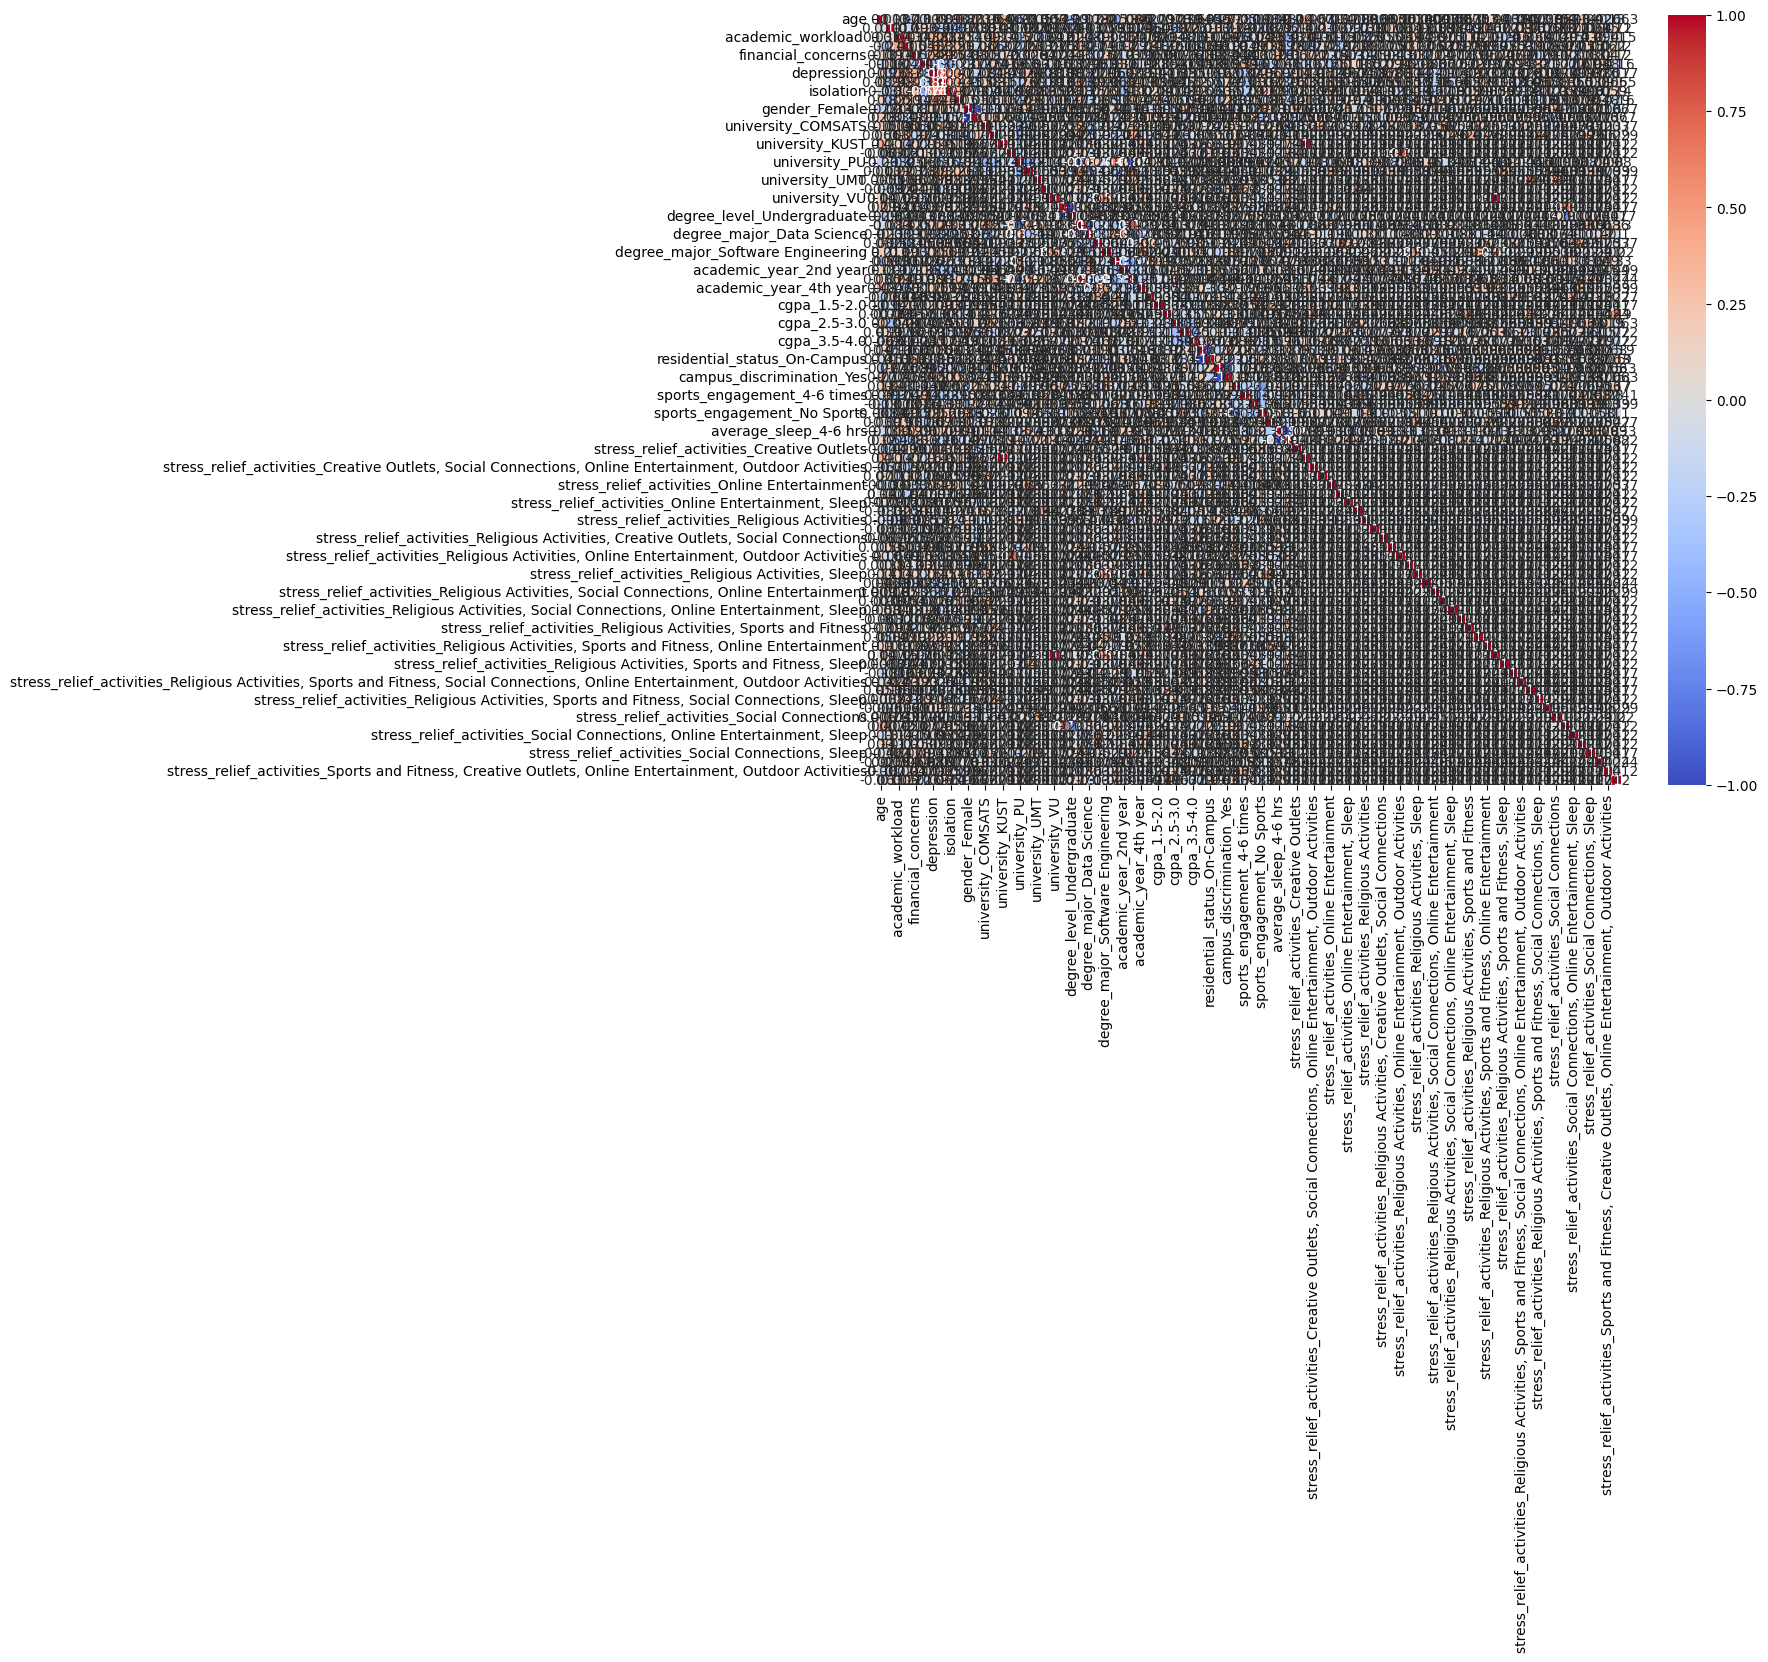

Accuracy: 55.56%


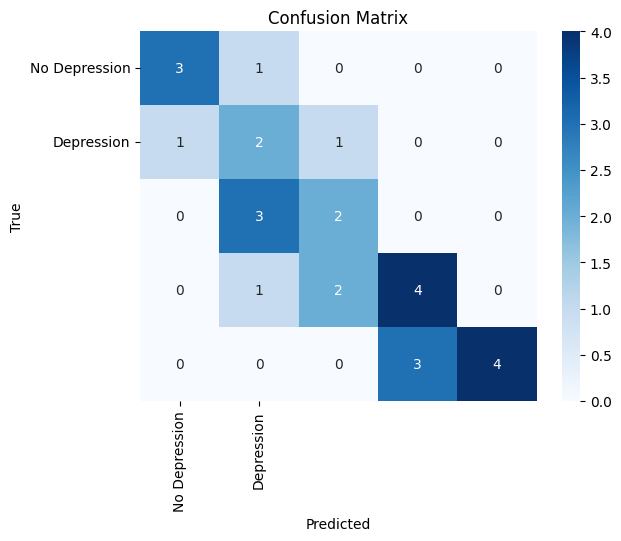

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.75      0.75         4
           2       0.29      0.50      0.36         4
           3       0.40      0.40      0.40         5
           4       0.57      0.57      0.57         7
           5       1.00      0.57      0.73         7

    accuracy                           0.56        27
   macro avg       0.60      0.56      0.56        27
weighted avg       0.63      0.56      0.58        27

Feature ranking:
1. Feature anxiety (0.12504046924770218)
2. Feature isolation (0.07791959417496726)
3. Feature future_insecurity (0.05278431824923899)
4. Feature financial_concerns (0.049219642278962875)
5. Feature academic_pressure (0.04408892572411233)
6. Feature social_relationships (0.04359243564028649)
7. Feature academic_workload  (0.03729398822132672)
8. Feature age (0.03585639041226493)
9. Feature study_satisfaction (0.03537171244254153)
10. Feature cgpa_3.5-4.0 (0.021691422

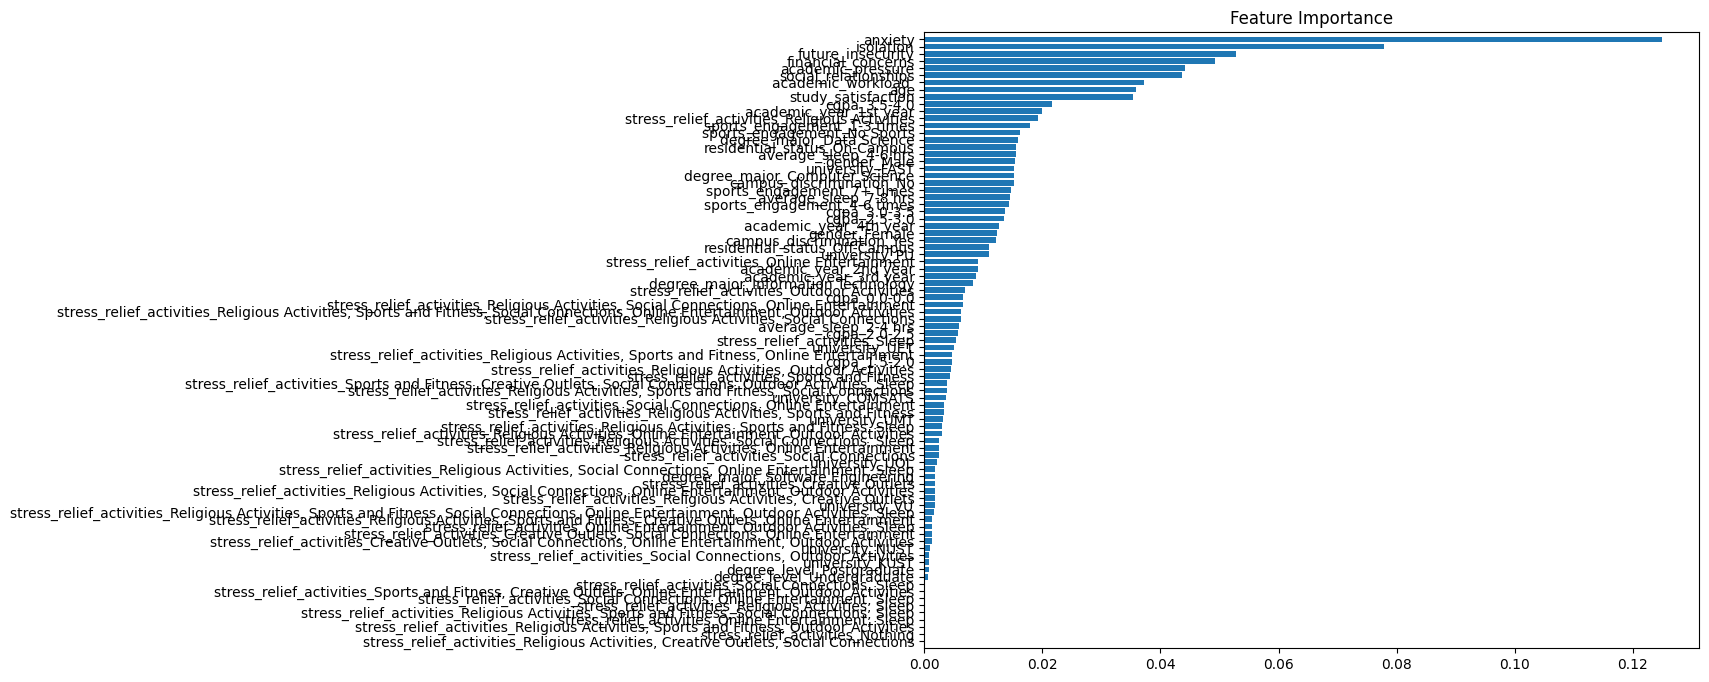

In [1]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Load the dataset
data = pd.read_csv('/kaggle/input/student-mental-health-survey/MentalHealthSurvey.csv')

# Basic statistics of the dataset
print(data.describe())

# Checking for missing values
print(data.isnull().sum())

# Visualize the distribution of 'age'
sns.histplot(data['age'])
plt.show()

# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data)

# Correlation matrix of numeric data
plt.figure(figsize=(12, 10))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

# Select features (X) and target (y)
X = data_encoded.drop('depression', axis=1)  # Drop 'depression' to use it as the target variable
y = data_encoded['depression']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate and train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importance")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.ylim([-1, X_train.shape[1]])
plt.gca().invert_yaxis()
plt.show()


Cross-validation accuracies: [0.38888889 0.5        0.52941176 0.76470588 0.41176471]


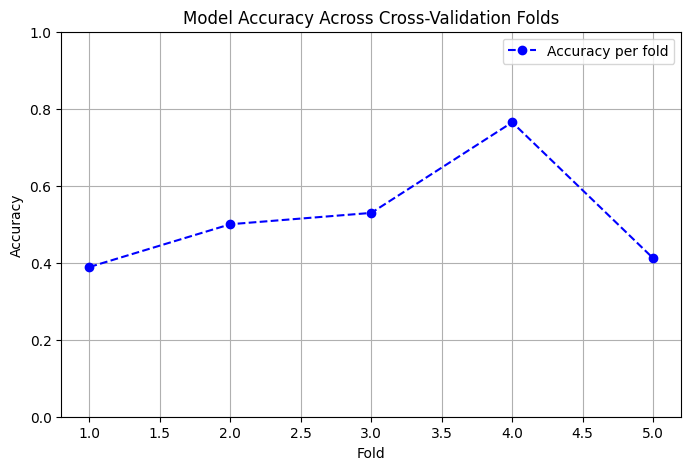

Mean Accuracy: 51.90%
Standard Deviation of Accuracy: 13.36%


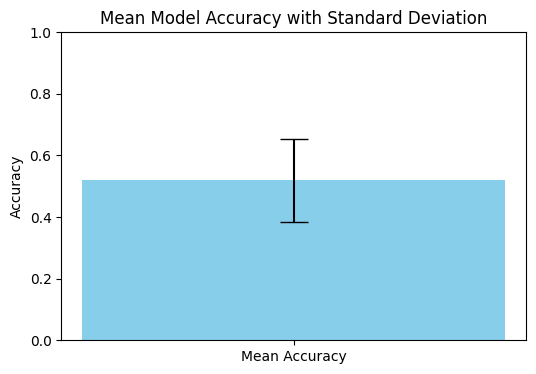

In [2]:
# Importing additional libraries for cross-validation and accuracy plotting
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform cross-validation (5 folds)
cv_scores = cross_val_score(model, X, y, cv=5)

# Print the individual accuracies
print(f"Cross-validation accuracies: {cv_scores}")

# Plotting cross-validation accuracies
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='b', label='Accuracy per fold')
plt.title('Model Accuracy Across Cross-Validation Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(True)
plt.legend()
plt.show()

# Plotting the mean accuracy
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Standard Deviation of Accuracy: {std_accuracy * 100:.2f}%")

# Plot mean accuracy as a bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Mean Accuracy'], [mean_accuracy], yerr=[std_accuracy], color='skyblue', capsize=10)
plt.ylim(0, 1)
plt.title('Mean Model Accuracy with Standard Deviation')
plt.ylabel('Accuracy')
plt.show()
